Irreducible Water Saturation (Swir): 0.20
Residual Oil Saturation (Sor): 0.10
Displacement Efficiency (ED): 0.88
Volumetric Sweep Efficiency (EV): 0.56
Recovery Factor (RF): 0.49


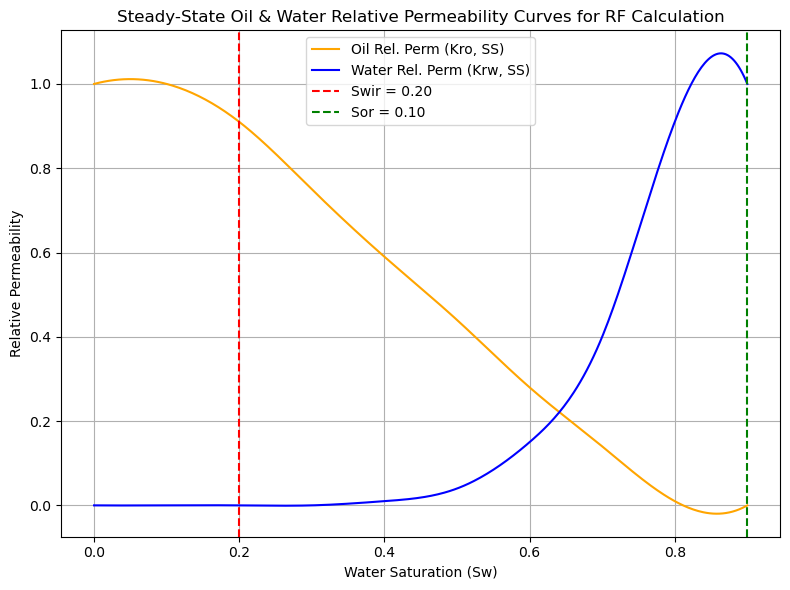

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


# Provided steady-state lab data for Kro and Krw
Sw_pct = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
Sw_measured = Sw_pct / 100
kro_measured = np.array([1.00, 1.00, 0.91, 0.75, 0.59, 0.44, 0.28, 0.14, 0.01, 0.00])
krw_measured = np.array([0.00, 0.00, 0.00, 0.00, 0.01, 0.04, 0.15, 0.40, 0.91, 1.00])


# Interpolation for smooth curves
Sw_fine = np.linspace(Sw_measured[0], Sw_measured[-1], 400)
kro_interp = interp1d(Sw_measured, kro_measured, kind='cubic')
krw_interp = interp1d(Sw_measured, krw_measured, kind='cubic')

kro = kro_interp(Sw_fine)
krw = krw_interp(Sw_fine)


#  calculation of Swir and Sor
Swir_idx = np.where(kro_measured < 1)[0][0]
Swir = Sw_measured[Swir_idx]                   
Sw_kro0_idx = np.where(kro_measured == 0)[0][0]
Sw_kro0 = Sw_measured[Sw_kro0_idx]            
Sor = 1 - Sw_kro0                           


# Recovery Factor Calculations
ED = (1 - Swir - Sor) / (1 - Swir)
EA = 0.7
Ev = 0.8
EV = EA * Ev
RF = ED * EV

# -------------------------
# Display results
print(f"Irreducible Water Saturation (Swir): {Swir:.2f}")
print(f"Residual Oil Saturation (Sor): {Sor:.2f}")
print(f"Displacement Efficiency (ED): {ED:.2f}")
print(f"Volumetric Sweep Efficiency (EV): {EV:.2f}")
print(f"Recovery Factor (RF): {RF:.2f}")

# -------------------------
# Plotting
plt.figure(figsize=(8,6))
plt.plot(Sw_fine, kro, color='orange', label='Oil Rel. Perm (Kro, SS)')
plt.plot(Sw_fine, krw, color='blue', label='Water Rel. Perm (Krw, SS)')
plt.axvline(Swir, color='red', linestyle='--', label=f'Swir = {Swir:.2f}')
plt.axvline(1 - Sor, color='green', linestyle='--', label=f'Sor = {Sor:.2f}')
plt.xlabel('Water Saturation (Sw)')
plt.ylabel('Relative Permeability')
plt.title('Steady-State Oil & Water Relative Permeability Curves for RF Calculation')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
